# Contexte de la démarche

La société Bottleneck utilise actuellement des outils qui ne permettent pas d'effectuer des analyses de ventes pertinentes.

Afin de pouvoir pallier cela, même de manière temporaire, le manager souhaite réaliser le rapprochement entre la base de l'ERP et celle du site de vente.

Après le rapprochement effectué, il souhaite connaître le chiffre d'affaires pour chaque produit d'une part et le chiffre d'affaire total des ventes en ligne d'autre part.

Pour finir, le manager souhaite savoir s'il n'y a pas eu des erreurs de saisie pour les prix de certains produits.

# Chargement des librairies utilisées

In [1]:
import pandas as pd
# Cette librairie permet le chargement, la manipulation et l'analyse de tables ou "Dataframes"

import numpy as np
# Cette librairie a l'avantage d'effectuer des calculs plus poussés plus rapidement que la librairie pandas

import matplotlib.pyplot as plt
# Cette librairie permet de visualiser graphiquement les analyses

import chardet as cd
# Cette librairie permettra de détecter l'encodage d'un fichier csv

# Chargement et nettoyage des Dataframes

## ERP

In [2]:
erp = pd.read_csv("erp.csv",sep=";")
erp
# Nous vérifions avec cette commande que notre dataframe est correctement chargée

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,"24,2",0,outofstock
1,3849,1,"34,3",0,outofstock
2,3850,1,"20,8",0,outofstock
3,4032,1,"14,1",0,outofstock
4,4039,1,46,0,outofstock
...,...,...,...,...,...
820,7203,0,45,30,instock
821,7204,0,45,9,instock
822,7247,1,"54,8",23,instock
823,7329,0,"26,5",14,instock


Nous allons commencer par vérifier l'unicité de la variable 'product_id' qui semble être la clé primaire de cette dataframe.
Pour ce faire, nous allons compter le nombre de valeurs uniques de la variable.

In [3]:
key = len(erp.product_id.unique())
key

825

Comme il y a 825 lignes de données dans la dataframe et qu'il y a 825 valeurs uniques possibles pour la variable 'product_id', nous pouvons conclure que l'unicité de la clé primaire est vrai.

Nous allons maintenant vérifier s'il y a des valeurs nulles dans la dataframe.

In [4]:
erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

Nous allons maintenant regarder les différents types des données présents.

In [5]:
erp.dtypes

product_id         int64
onsale_web         int64
price             object
stock_quantity     int64
stock_status      object
dtype: object

Le type de données de la colonne 'price' étant en object et non en numérique, nous allons le changer en conséquence. Mais avant cela, nous devons remplacer les virgules des prix par des points car cela empêchera la conversion en numérique.

In [6]:
erp.price = erp.price.str.replace(',', '.')
erp.price = erp.price.astype(float)

In [7]:
erp.price.dtype
# Cette commande nous permettra de vérifier si la conversion a été faite en nous donnant le type de données 
# de la variable souhaitée

dtype('float64')

Nous allons maintenant supprimer les doublons.

In [8]:
erp = erp.drop_duplicates()

Nous allons maintenant réaliser plusieurs échantillonages liés aux statuts des stocks.

In [9]:
erp_instock = erp[erp.stock_status == 'instock']
erp_instock.stock_quantity.unique()

array([ 15,  34,  12,  66,  36,  22,  46,  41,  35,  16, 112, 267,  73,
        60,  10,  27,  65,  31, 157,  98,  28,  11,  50,  54,  53,  48,
        14,  37,  45,  24,  19,  26,  43,   7,   6,  42,   5,   1,   8,
        33,  18,  17,  57, 128,  70,  58, 167, 100,  94, 276, 109,  47,
       137,  90,  99, 209,  55,  13, 105, 190,  69,  89, 195, 578,   2,
        83, 180,  20,  49,  85, 141,  25,  64, 102,  21,  56,   4, 133,
         3,  96,   9,  61,  39, 237, 114, 106,  23,  32,  93, 161,  30,
       178,  29, 151, 140,  76,  97, 163,  62, 257, 284, 168, 143,  92,
        88,  44,   0,  95, 289,  72, 203, 129,  38,  63, 130,  51, 123,
       118, 101,  84, 132, 211, 124, 120, 363, 192,  40,  91], dtype=int64)

Nous pouvons rapidement nous apercevoir qu'une valeur n'est pas cohérente avec cette échantillonage, le 0. Nous allons donc changer le statut 'instock' en 'outofstock' pour cette valeur.

In [10]:
erp.loc[(erp.stock_status == 'instock') & (erp.stock_quantity == 0), 'stock_status'] = 'outofstock'
erp[erp.stock_status == 'instock'].stock_quantity.unique()
# Nous utilisons cette dernière commande afin de contrôler que le changement a bien été effectué

array([ 15,  34,  12,  66,  36,  22,  46,  41,  35,  16, 112, 267,  73,
        60,  10,  27,  65,  31, 157,  98,  28,  11,  50,  54,  53,  48,
        14,  37,  45,  24,  19,  26,  43,   7,   6,  42,   5,   1,   8,
        33,  18,  17,  57, 128,  70,  58, 167, 100,  94, 276, 109,  47,
       137,  90,  99, 209,  55,  13, 105, 190,  69,  89, 195, 578,   2,
        83, 180,  20,  49,  85, 141,  25,  64, 102,  21,  56,   4, 133,
         3,  96,   9,  61,  39, 237, 114, 106,  23,  32,  93, 161,  30,
       178,  29, 151, 140,  76,  97, 163,  62, 257, 284, 168, 143,  92,
        88,  44,  95, 289,  72, 203, 129,  38,  63, 130,  51, 123, 118,
       101,  84, 132, 211, 124, 120, 363, 192,  40,  91], dtype=int64)

In [11]:
erp_outofstock = erp[erp.stock_status == 'outofstock']
erp_outofstock.stock_quantity.unique()

array([0], dtype=int64)

Ceci conclue le nettoyage de notre première dataframe.

## Liaison

In [12]:
liaison = pd.read_csv("liaison.csv",sep=";")
liaison
# Nous vérifions avec cette commande que notre dataframe est correctement chargée

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


Suite à la demande de Sylvie, nous allons renommer la colonne id_web qui correspond à la colonne "sku" de la dataframe web.

In [13]:
liaison = liaison.rename(columns = {'id_web':'sku'})
liaison

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


Nous allons maintenant vérifier l'unicité de chaque variable pour savoir si chaque valeur sku possible est affectée à une seule et unique valeur product_id.

In [14]:
key_1 = len(liaison.product_id.unique())
key_1

825

Nous retrouvons bien les 825 product_id présents dans la dataframe erp.

In [15]:
key_2 = len(liaison.sku.unique())
key_2

735

In [16]:
liaison.sku.unique()

array(['15298', '15296', '15300', '19814', '19815', '15303', '14975',
       '16042', '14980', '16041', '15269', '14977', '16044', '16043',
       '16449', '16045', '16030', '13127', '19816', nan, '16029', '16039',
       '16318', '16275', '16498', '16320', '16319', '15966', '15022',
       '15967', '15490', '16416', '11862', '15444', '15953', '12045',
       '13074', '15941', '16069', '13072', '15440', '13435', '13078',
       '13117', '16296', '16014', '16462', '16013', '16180', '15676',
       '16120', '15564', '15675', '15378', '15813', '13416', '14905',
       '15767', '16505', '15683', '16504', '15787', '14800', '15353',
       '15382', '15339', '11668', '13209', '15341', '13217', '304',
       '11641', '1662', '1360', '15648', '1364', '7086', '1366', '15140',
       '16238', '16237', '15141', '14944', '14941', '14751', '16093',
       '15668', '15373', '15375', '14474', '15482', '13453', '15075',
       '16124', '15785', '15784', '15786', '14332', '16210', '16211',
       '16209

Comme nous pouvons le constater, la variable sku possèdent 735 valeurs possibles en comptant la valeur nulle, nous allons maintenant vérifier combien il y a de valeurs nulles dans cette dataframe.

In [17]:
liaison.isnull().sum()

product_id     0
sku           91
dtype: int64

Puisqu'il y a 734 valeurs possibles avec 91 valeurs nulles pour la valeur sku; nous retrouvons bien les 825 lignes de données. Nous pouvons donc conclure qu'il y a bien une seule et unique valeur product_id possible pour chaque valeur sku renseignée.

Nous allons laisser les valeurs nulles non renseignées.

Nous allons maintenant regarder le type de données des variables de cette dataframe.

In [18]:
liaison.dtypes

product_id     int64
sku           object
dtype: object

Nous pouvons constater que le type de données de la variable 'product_id' de cette dataframe correspond à celui de la variable ayant le même nom de la dataframe précédente, donc nous n'avons pas besoin de la changer.

Puisque la variable 'sku' contient des valeurs avec des caractères spéciaux, nous ne pourrons pas changer son type de données.

## Web

In [19]:
with open("web.csv", 'rb') as rawdata:
    result = cd.detect(rawdata.read(10000))
    print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [20]:
web = pd.read_csv("web.csv", sep =';', encoding='Windows-1252')
print(web.shape)
web

(1513, 28)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


Comme pour la dataframe 'erp', nous allons commencer par vérifier l'unicité de la variable 'sku' qui semble être la clé primaire de cette dataframe.

In [21]:
key = len(web.sku.unique())
key

715

Comme nous nous pouvons le constater, nous n'avons que 715 valeurs possibles au lieu des 1513 attendues. Nous allons y revenir plus tard dans le nettoyage.

In [22]:
web.isnull().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

Quatre variables ne contiennent aucune valeur donc nous allons les supprimer.

In [23]:
web = web.drop(columns=['tax_class', 'post_content', 'post_password','post_content_filtered'])
web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,...,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,...,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,...,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


Nous allons à présent regarder les valeurs possibles des variables pour pouvoir supprimer celles qui n'apporteront rien aux analyses.

In [24]:
web.sku.unique()

array(['bon-cadeau-25-euros', '15298', '15296', '15300', '19814', '19815',
       '15303', '14975', '16042', '14980', '16041', '15269', '14977',
       '16044', '16043', '16449', '16045', '16030', '13127', '19816',
       '16029', '16039', '16318', '16275', '16498', '16320', '16319',
       '15966', '15022', '15967', '15490', '16416', '11862', '15444',
       '15953', '12045', '13074', '15941', '16069', '13072', '15440',
       '13435', '13078', '13117', '16296', '16014', '16462', '16013',
       '16180', '15676', '16120', '15564', '15675', '15378', '15813',
       '13416', '14905', '15767', '16505', '15683', '16504', '15787',
       '14800', '15353', '15382', '15339', '11668', '13209', '15341',
       '13217', '304', '11641', '1662', '1360', '15648', '1364', '7086',
       '1366', '15140', '16238', '16237', '15141', '14944', '14941',
       '14751', '16093', '15668', '15373', '15375', '14474', '15482',
       '13453', '15075', '16124', '15785', '15784', '15786', '14332',
       '16210

In [25]:
web.virtual.unique()

array([0], dtype=int64)

In [26]:
web.downloadable.unique()

array([0], dtype=int64)

In [27]:
web.rating_count.unique()

array([0], dtype=int64)

In [28]:
web.average_rating.unique()

array([ 0., nan])

In [29]:
web.total_sales.unique()

array([10.,  6.,  0.,  3.,  7., 14.,  1., 23., 18., 11.,  9., 20., 19.,
       62.,  4., 12.,  5.,  2., 40., 30., 87., 36., 43., 13., 17., 42.,
        8., 46., 16., 15., nan, 96., 32., 38., 29., 33., 22., 24., 26.,
       21., 41., 37.])

In [30]:
web.tax_status.unique()

array(['taxable', nan], dtype=object)

In [31]:
web.post_author.unique()

array([ 1.,  2., nan])

In [32]:
web.post_date.unique()

array(['2018-06-01 13:53:46', '2018-02-08 12:58:52',
       '2018-02-08 13:49:41', '2018-02-08 14:08:36',
       '2018-02-09 14:01:05', '2018-02-12 09:04:37',
       '2018-02-12 09:13:35', '2018-02-12 09:45:14',
       '2018-02-12 09:54:27', '2018-02-12 10:03:05',
       '2018-02-12 10:09:03', '2018-02-12 10:16:27',
       '2018-02-12 10:28:30', '2018-02-12 10:34:08',
       '2018-02-12 10:41:11', '2018-02-12 10:50:59',
       '2018-02-12 10:58:41', '2018-02-12 11:06:11',
       '2018-02-12 11:18:33', '2018-02-12 11:25:39',
       '2018-02-12 11:38:55', '2018-02-12 11:56:27',
       '2018-02-12 12:07:23', '2018-02-12 12:12:28',
       '2018-02-12 12:41:06', '2018-02-12 12:49:29',
       '2018-02-12 12:56:54', '2018-02-12 13:08:24',
       '2018-02-12 13:14:22', '2018-02-12 13:17:53',
       '2018-02-12 13:24:30', '2018-02-12 13:42:28',
       '2018-02-12 13:46:23', '2018-02-12 14:02:17',
       '2018-02-12 14:08:13', '2018-02-12 14:17:41',
       '2018-02-12 14:25:28', '2018-02-12 14:2

In [33]:
web.post_date_gmt.unique()

array(['2018-06-01 11:53:46', '2018-02-08 11:58:52',
       '2018-02-08 12:49:41', '2018-02-08 13:08:36',
       '2018-02-09 13:01:05', '2018-02-12 08:04:37',
       '2018-02-12 08:13:35', '2018-02-12 08:45:14',
       '2018-02-12 08:54:27', '2018-02-12 09:03:05',
       '2018-02-12 09:09:03', '2018-02-12 09:16:27',
       '2018-02-12 09:28:30', '2018-02-12 09:34:08',
       '2018-02-12 09:41:11', '2018-02-12 09:50:59',
       '2018-02-12 09:58:41', '2018-02-12 10:06:11',
       '2018-02-12 10:18:33', '2018-02-12 10:25:39',
       '2018-02-12 10:38:55', '2018-02-12 10:56:27',
       '2018-02-12 11:07:23', '2018-02-12 11:12:28',
       '2018-02-12 11:41:06', '2018-02-12 11:49:29',
       '2018-02-12 11:56:54', '2018-02-12 12:08:24',
       '2018-02-12 12:14:22', '2018-02-12 12:17:53',
       '2018-02-12 12:24:30', '2018-02-12 12:42:28',
       '2018-02-12 12:46:23', '2018-02-12 13:02:17',
       '2018-02-12 13:08:13', '2018-02-12 13:17:41',
       '2018-02-12 13:25:28', '2018-02-12 13:2

In [34]:
web.post_title.unique()

array(['Bon cadeau de 25€', 'Pierre Jean Villa Saint-Joseph Préface 2018',
       'Pierre Jean Villa Saint-Joseph Rouge Tildé 2017',
       'Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018',
       'Pierre Jean Villa IGP Collines Rhodaniennes Gamine 2018',
       'Pierre Jean Villa Côte Rôtie Carmina 2017',
       "Pierre Jean Villa Saint-Joseph Saut De l'Ange 2018",
       'Pierre Gaillard Condrieu 2018', 'Pierre Gaillard Cornas 2017',
       'Pierre Gaillard Côte Rôtie Esprit de Blonde 2017',
       'Pierre Gaillard Côte Rôtie 2018',
       'Pierre Gaillard Côte Rôtie Rose Pourpre 2017',
       'Pierre Gaillard Côtes-du-Rhône Blanc Les Gendrines 2018',
       'Pierre Gaillard Saint-Joseph Rouge Clos de Cuminaille 2018',
       'Pierre Gaillard Saint-Joseph Rouge 2018',
       'Pierre Gaillard Saint-Joseph Blanc 2019',
       'Jeanne Gaillard IGP Collines Rhodaniennes Syrah Terre de Mandrin 2018',
       'Clos du Mont-Olivet Châteauneuf-du-Pape Blanc 2019',
       'Clos du Mont

In [35]:
web.post_excerpt.unique()

array(['<span style="color: #a85253;"><strong>Parlons peu, parlons vin.</strong>\n<strong>Parlons cadeau !</strong></span>\n\nUn bon cadeau à offrir à vos proches... sans modération !',
       'Il exhale un nez subtil, racé avec du poivre fin et de la tourbe. La bouche est une caresse grâce à des tanins élégants. De la haute couture.',
       'Les vieilles vignes lui apportent une rare profondeur. L’attaque affiche de l’élégance. La bouche est portée par un minéral saisissant et des tanins de belle qualité. Grande bouteille !',
       'Dentelle de fruit de jeunes syrah, aux tanins légers et épicés. Hyper digeste. Un délice.',
       'Gamine représente tout le fruité et la gourmandise de la syrah. Une touche épicée et des tanins fondus lui apportent une belle complexité.',
       'Le côte rôtie Carmina monte en puissance mais garde un milieu de bouche pulpeux aux tanins aboutis. En référence à Carmina Burana, ce Côte Rôtie associe puissance, pureté, complexité et sensualité.',
       "R

In [36]:
web.post_status.unique()

array(['publish', nan], dtype=object)

In [37]:
web.comment_status.unique()

array(['closed', nan], dtype=object)

In [38]:
web.ping_status.unique()

array(['closed', nan], dtype=object)

In [39]:
web.post_name.unique()

array(['bon-cadeau-de-25-euros',
       'pierre-jean-villa-saint-joseph-preface-2018',
       'pierre-jean-villa-saint-joseph-tilde-2017',
       'pierre-jean-villa-croze-hermitage-accroche-coeur-2018',
       'pierre-jean-villa-igp-gamine-2018',
       'pierre-jean-villa-cote-rotie-carmina-2017',
       'pierre-jean-villa-saint-joseph-saut-ange-2018',
       'pierre-gaillard-condrieu-2018', 'pierre-gaillard-cornas-2017',
       'pierre-gaillard-cote-rotie-esprit-blond-2017',
       'pierre-gaillard-cote-rotie-2018',
       'pierre-gaillard-cote-rotie-rose-pourpre-2017',
       'pierre-gaillard-gendrines-2018',
       'pierre-gaillard-saint-joseph-cuminaille-2018',
       'pierre-gaillard-saint-joseph-2018',
       'pierre-gaillard-saint-joseph-blanc-2019',
       'pierre-gaillard-syrah-terre-mandrin-2018',
       'mont-olivet-chateauneuf-pape-blanc-2019',
       'clos-du-mont-olivet-chateauneuf-du-pape-2012',
       'clos-du-mont-olivet-chateauneuf-du-pape-papet-2018',
       'clos-du

In [40]:
web.post_modified.unique()

array(['2018-06-01 14:13:57', '2019-12-30 09:30:29',
       '2019-12-21 09:00:17', '2020-06-26 18:15:03',
       '2020-01-04 16:36:01', '2020-01-04 16:36:10',
       '2019-11-02 13:25:07', '2020-08-14 18:15:02',
       '2020-08-14 10:15:02', '2020-08-24 14:00:03',
       '2020-08-03 09:55:03', '2020-08-27 09:30:07',
       '2020-08-14 17:45:03', '2020-08-26 14:05:02',
       '2020-08-24 09:30:15', '2020-08-27 17:15:02',
       '2020-08-24 18:25:02', '2020-06-09 15:41:44',
       '2020-08-01 09:35:04', '2020-08-25 15:45:02',
       '2020-08-27 09:30:16', '2020-08-25 11:15:03',
       '2020-08-21 11:25:03', '2020-08-25 10:25:02',
       '2020-08-27 18:45:02', '2020-08-14 18:35:02',
       '2020-08-25 18:25:02', '2020-08-27 16:05:04',
       '2019-01-31 12:12:56', '2020-08-27 09:30:09',
       '2020-08-27 16:05:03', '2020-08-26 09:30:03',
       '2019-12-09 10:40:03', '2020-06-25 14:00:03',
       '2020-08-24 11:45:03', '2020-06-24 17:15:01',
       '2020-08-22 17:55:02', '2020-07-11 15:0

In [41]:
web.post_modified_gmt.unique()

array(['2018-06-01 12:13:57', '2019-12-30 08:30:29',
       '2019-12-21 08:00:17', '2020-06-26 16:15:03',
       '2020-01-04 15:36:01', '2020-01-04 15:36:10',
       '2019-11-02 12:25:07', '2020-08-14 16:15:02',
       '2020-08-14 08:15:02', '2020-08-24 12:00:03',
       '2020-08-03 07:55:03', '2020-08-27 07:30:07',
       '2020-08-14 15:45:03', '2020-08-26 12:05:02',
       '2020-08-24 07:30:15', '2020-08-27 15:15:02',
       '2020-08-24 16:25:02', '2020-06-09 13:41:44',
       '2020-08-01 07:35:04', '2020-08-25 13:45:02',
       '2020-08-27 07:30:16', '2020-08-25 09:15:03',
       '2020-08-21 09:25:03', '2020-08-25 08:25:02',
       '2020-08-27 16:45:02', '2020-08-14 16:35:02',
       '2020-08-25 16:25:02', '2020-08-27 14:05:04',
       '2019-01-31 11:12:56', '2020-08-27 07:30:09',
       '2020-08-27 14:05:03', '2020-08-26 07:30:03',
       '2019-12-09 09:40:03', '2020-06-25 12:00:03',
       '2020-08-24 09:45:03', '2020-06-24 15:15:01',
       '2020-08-22 15:55:02', '2020-07-11 13:0

In [42]:
web.post_parent.unique()

array([ 0., nan])

In [43]:
web.guid.unique()

array(['https://www.bottle-neck.fr/?post_type=product&#038;p=4954',
       'https://www.bottle-neck.fr/?post_type=product&#038;p=3847',
       'https://www.bottle-neck.fr/?post_type=product&#038;p=3849', ...,
       'https://www.bottle-neck.fr/wp-content/uploads/2020/03/jamet-cote-rotie-fructus-voluptas-2018.jpg',
       'https://www.bottle-neck.fr/wp-content/uploads/2020/03/clos-du-mont-olivet-chateauneuf-du-pape-2007-2.jpg',
       'https://www.bottle-neck.fr/wp-content/uploads/2020/03/domaine-saint-nicolas-fiefs-vendeens-blanc-les-clous-2019.jpg'],
      dtype=object)

In [44]:
web.menu_order.unique()

array([ 0., nan])

In [45]:
web.post_type.unique()

array(['product', nan, 'attachment'], dtype=object)

In [46]:
web.post_mime_type.unique()

array([nan, 'image/jpeg'], dtype=object)

In [47]:
web.comment_count.unique()

array([ 0., nan])

Au vu des résultats, nous allons supprimer les variables 'virtual', 'downloadable', 'rating_count', 'average_rating', 'tax_status', 'post_status', 'comment_status', 'ping_status', 'post_parent', 'menu_order', 'post_mime_type' et 'comment_count' sur la base qu'elles n'apportent rien de pertinent à toute analyse dû au fait qu'elles n'ont qu'une seule valeur ou deux si nous comptons les valeurs non renseignées.

Nous allons également supprimer les colonnes 'post_date', 'post_modified' et 'post_name' puisque nous pouvons retrouver leurs informations dans d'autres colonnes.

In [48]:
web = web.drop(columns=['virtual', 
                        'downloadable', 
                        'rating_count', 
                        'average_rating', 
                        'tax_status', 
                        'post_status', 
                        'comment_status', 
                        'ping_status', 
                        'post_parent', 
                        'menu_order', 
                        'post_mime_type',
                        'comment_count', 
                        'post_date',
                        'post_modified',
                        'post_name'])
web

,sku,total_sales,post_author,post_date_gmt,post_title,post_excerpt,post_modified_gmt,guid,post_type
0,bon-cadeau-25-euros,10.0,1.0,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
1,15298,6.0,2.0,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,15296,0.0,2.0,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
3,15300,0.0,2.0,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
4,19814,3.0,2.0,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...
1508,16135,5.0,2.0,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,NaN,2020-08-26 15:35:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1509,15891,0.0,2.0,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,NaN,2020-08-26 15:35:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1510,15887,0.0,2.0,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,NaN,2020-08-14 16:15:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1511,13127-1,0.0,2.0,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,2020-07-20 15:09:06,https://www.bottle-neck.fr/wp-content/uploads/...,attachment


Nous allons maintenant supprimer toutes les lignes vides, les doublons et à nouveau vérifier pour les valeurs nulles des variables.

In [49]:
web = web.dropna(how='all')
# Cette commande supprimera toutes les lignes vides

web = web.drop_duplicates()
# Cette commande supprime toutes les lignes doubles

print(web.shape)
# Cette commende sert à vérifier la taille de la dataframe

web.isnull().sum()

(1430, 9)


sku                    2
total_sales            0
post_author            0
post_date_gmt          0
post_title             0
post_excerpt         714
post_modified_gmt      0
guid                   0
post_type              0
dtype: int64

Nous pouvons constater que le nombre de ligne de données correspond au double du nombre de valeurs possible pour la variable 'sku'. Nous allons maintenant regrouper ces lignes en fonction de la variable 'post_type' et regarder si cela explique le nombre de valeurs de la variable 'sku' et ainsi la définir en tant que clé primaire.

In [50]:
web_attachment = web[web.post_type == 'attachment']
print(web_attachment.shape)
print('le nombre de valeurs possible est ',len(web_attachment.sku.unique()))
print(web_attachment.isnull().sum())

(714, 9)
le nombre de valeurs possible est  714
sku                    0
total_sales            0
post_author            0
post_date_gmt          0
post_title             0
post_excerpt         714
post_modified_gmt      0
guid                   0
post_type              0
dtype: int64


In [51]:
web_product = web[web.post_type == 'product']
print(web_product.shape)
print('le nombre de valeurs possible est ',len(web_product.sku.unique()))
print(web_product.sku.unique())
print(web_product.isnull().sum())

(716, 9)
le nombre de valeurs possible est  715
['bon-cadeau-25-euros' '15298' '15296' '15300' '19814' '19815' '15303'
 '14975' '16042' '14980' '16041' '15269' '14977' '16044' '16043' '16449'
 '16045' '16030' '13127' '19816' '16029' '16039' '16318' '16275' '16498'
 '16320' '16319' '15966' '15022' '15967' '15490' '16416' '11862' '15444'
 '15953' '12045' '13074' '15941' '16069' '13072' '15440' '13435' '13078'
 '13117' '16296' '16014' '16462' '16013' '16180' '15676' '16120' '15564'
 '15675' '15378' '15813' '13416' '14905' '15767' '16505' '15683' '16504'
 '15787' '14800' '15353' '15382' '15339' '11668' '13209' '15341' '13217'
 '304' '11641' '1662' '1360' '15648' '1364' '7086' '1366' '15140' '16238'
 '16237' '15141' '14944' '14941' '14751' '16093' '15668' '15373' '15375'
 '14474' '15482' '13453' '15075' '16124' '15785' '15784' '15786' '14332'
 '16210' '16211' '16209' '15629' '15583' '16160' '16166' '15783' '16560'
 '15747' '15746' '16190' '16189' '16265' '16191' '16263' '15605' '16529'
 '15

Grâce à ces résultats, nous pouvons rapidement comprendre que certains produits ont un 'attachment' mais que la clé primaire reste la même puisqu'il s'agit du même produit.

In [52]:
web.isnull().sum()

sku                    2
total_sales            0
post_author            0
post_date_gmt          0
post_title             0
post_excerpt         714
post_modified_gmt      0
guid                   0
post_type              0
dtype: int64

Les deux valeurs nulles constatées dans la variable 'sku' expliquent pourquoi il y a 715 valeurs possibles et non 716 pour l'échantillon 'web_product', la valeur nulle comptant comme une valeur possible.

Cependant, le fait qu'une donnée comme la clé primaire ne soit pas renseignée indique une potentielle malfonction des serveurs qui ont mal enregistré les données.
Il faut donc contacter la personne en charge du site afin de lui remonter le problème de pertes de données.

Nous allons afficher les données pour lesquelles le sku n'est pas fourni et les stocker dans un autre dataframe pour plus tard.

In [53]:
web_sku_missing = web[web.sku.isnull()]
web_sku_missing

,sku,total_sales,post_author,post_date_gmt,post_title,post_excerpt,post_modified_gmt,guid,post_type
470,NaN,0.0,2.0,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product
471,NaN,0.0,2.0,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product


Puisque les sku ne peuvent être retrouvés avec les informations dont nous disposons actuellement, nous allons nous aider de la variable 'guid' de ces produits dont les quatre derniers caractères correspondent à leur product_id pour tout de même réaliser la jointure entre les différentes dataframes.

In [54]:
web_sku_missing.guid.unique()

array(['https://www.bottle-neck.fr/?post_type=product&#038;p=5070',
       'https://www.bottle-neck.fr/?post_type=product&#038;p=5075'],
      dtype=object)

Maintenant que nous connaissons les product_id, nous pouvons passer à la suite.

Nous allons maintenant créer une variable 'product_id' que nous renseignerons pour les deux valeurs sku manquantes.

In [55]:
web_sku_missing = web_sku_missing.assign(product_id = np.nan)
web_sku_missing

,sku,total_sales,post_author,post_date_gmt,post_title,post_excerpt,post_modified_gmt,guid,post_type,product_id
470,NaN,0.0,2.0,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
471,NaN,0.0,2.0,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


In [56]:
web_sku_missing.loc[470,'product_id']=5070
web_sku_missing.loc[471,'product_id']=5075
web_sku_missing

,sku,total_sales,post_author,post_date_gmt,post_title,post_excerpt,post_modified_gmt,guid,post_type,product_id
470,NaN,0.0,2.0,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product,5070.0
471,NaN,0.0,2.0,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product,5075.0


Nous en profitons pour changer les types de données des variables 'total_sales', 'post_author' et 'product_id' en int d'une part et les variables 'post_date_gmt' et 'post_modified_gmt' en datetime d'autre part.

In [57]:
web_sku_missing.total_sales = web_sku_missing.total_sales.astype(int)
web_sku_missing.post_author = web_sku_missing.post_author.astype(int)
web_sku_missing.product_id = web_sku_missing.product_id.astype(int)
web_sku_missing.post_date_gmt = pd.to_datetime(web_sku_missing.post_date_gmt)
web_sku_missing.post_modified_gmt = pd.to_datetime(web_sku_missing.post_modified_gmt)
web_sku_missing.dtypes

sku                          object
total_sales                   int32
post_author                   int32
post_date_gmt        datetime64[ns]
post_title                   object
post_excerpt                 object
post_modified_gmt    datetime64[ns]
guid                         object
post_type                    object
product_id                    int32
dtype: object

Maintenant que c'est fait, nous allons poursuivre notre nettoyage de données en regardant le type de données des variables.

In [58]:
web.dtypes

sku                   object
total_sales          float64
post_author          float64
post_date_gmt         object
post_title            object
post_excerpt          object
post_modified_gmt     object
guid                  object
post_type             object
dtype: object

Les variables 'total_sales' et 'post_author' étant des variables contenant uniquement des nombres entiers, nous allons changer leur type.

In [59]:
web.total_sales = web.total_sales.astype(int)
web.post_author = web.post_author.astype(int)

Nous allons également changer les types de données des variables 'post_date_gmt' et 'post_modified_gmt' en type datetime.

In [60]:
web.post_date_gmt = pd.to_datetime(web.post_date_gmt)
web.post_modified_gmt = pd.to_datetime(web.post_modified_gmt)

Nous allons maintenant vérifier que les changements ont bien été fait.

In [61]:
web.dtypes

sku                          object
total_sales                   int32
post_author                   int32
post_date_gmt        datetime64[ns]
post_title                   object
post_excerpt                 object
post_modified_gmt    datetime64[ns]
guid                         object
post_type                    object
dtype: object

Ceci conclut le nettoyage des données. Nous pouvons maintenant passer au différentes missions demandées.

# Jointure des exports

Nous allons dès à présent exécuter la jointure entre les exports grâce à la dataframe liaison.

Nous allons commencer par réaliser la jointure entre les dataframes 'erp' et 'liaison'.

In [62]:
erp_liaison = erp.merge(liaison, how ='outer')
erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN
821,7204,0,45.0,9,instock,NaN
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


Nous pouvons dès à présent joindre cette dataframe avec web.

In [63]:
erp_web = erp_liaison.merge(web, how='inner')
erp_web = erp_web[erp_web.sku.notnull()] # Nous excluons toutes les valeurs nulles
erp_web

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_author,post_date_gmt,post_title,post_excerpt,post_modified_gmt,guid,post_type
0,3847,1,24.2,0,outofstock,15298,6,2,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
1,3847,1,24.2,0,outofstock,15298,6,2,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,NaN,2019-12-30 08:30:29,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
2,3849,1,34.3,0,outofstock,15296,0,2,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
3,3849,1,34.3,0,outofstock,15296,0,2,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,NaN,2019-12-21 08:00:17,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
4,3850,1,20.8,0,outofstock,15300,0,2,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,7025,1,69.0,2,instock,15887,0,2,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,NaN,2020-08-14 16:15:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1606,7247,1,54.8,23,instock,13127-1,0,2,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product
1607,7247,1,54.8,23,instock,13127-1,0,2,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,2020-07-20 15:09:06,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1608,7338,1,16.3,45,instock,16230,0,2,2020-07-20 09:00:00,Domaine Saint-Nicolas Vin de France Blanc Les ...,Issu d'un assemblage de chenin blanc et de cha...,2020-08-13 08:45:03,https://www.bottle-neck.fr/?post_type=product&...,product


Nous allons faire de même avec nos produits dont les sku n'ont pas été renseignés.

In [64]:
web_sku_missing_join = erp.merge(web_sku_missing)
print(web_sku_missing_join.shape)
web_sku_missing_join

(2, 14)


,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_author,post_date_gmt,post_title,post_excerpt,post_modified_gmt,guid,post_type
0,5070,1,84.7,0,outofstock,NaN,0,2,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product
1,5075,1,43.3,0,outofstock,NaN,0,2,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product


Nous pouvons maintenant réaliser une concaténation des deux dataframes précédentes afin d'obtenir au final le rapprochement des exports demandés.

In [65]:
erp_web_final = pd.concat([erp_web, web_sku_missing_join], ignore_index = True)
erp_web_final

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_author,post_date_gmt,post_title,post_excerpt,post_modified_gmt,guid,post_type
0,3847,1,24.2,0,outofstock,15298,6,2,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
1,3847,1,24.2,0,outofstock,15298,6,2,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,NaN,2019-12-30 08:30:29,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
2,3849,1,34.3,0,outofstock,15296,0,2,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
3,3849,1,34.3,0,outofstock,15296,0,2,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,NaN,2019-12-21 08:00:17,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
4,3850,1,20.8,0,outofstock,15300,0,2,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,7247,1,54.8,23,instock,13127-1,0,2,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,2020-07-20 15:09:06,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1426,7338,1,16.3,45,instock,16230,0,2,2020-07-20 09:00:00,Domaine Saint-Nicolas Vin de France Blanc Les ...,Issu d'un assemblage de chenin blanc et de cha...,2020-08-13 08:45:03,https://www.bottle-neck.fr/?post_type=product&...,product
1427,7338,1,16.3,45,instock,16230,0,2,2020-07-20 09:00:00,Domaine Saint-Nicolas Vin de France Blanc Les ...,NaN,2020-08-13 08:45:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1428,5070,1,84.7,0,outofstock,NaN,0,2,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product


In [66]:
erp_web_final.dtypes

product_id                    int64
onsale_web                    int64
price                       float64
stock_quantity                int64
stock_status                 object
sku                          object
total_sales                   int32
post_author                   int32
post_date_gmt        datetime64[ns]
post_title                   object
post_excerpt                 object
post_modified_gmt    datetime64[ns]
guid                         object
post_type                    object
dtype: object

Ceci conclut la jointure des exports demandée.

# Chiffres d'affaires

Attention, il est à noter que, comme aucune unité n'a été fournis pour les prix, nous avons supposé qu'ils étaient en euros.

Ici, nous souhaitons connaitre le chiffre d'affaires par produit.

In [67]:
erp_web_final_product = erp_web_final[erp_web_final.post_type == 'product']
erp_web_final_product = erp_web_final_product.assign(CA = erp_web_final_product.total_sales * erp_web_final_product.price)
erp_web_final_product.CA = np.round(erp_web_final_product.CA,1)
erp_web_final_product

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_author,post_date_gmt,post_title,post_excerpt,post_modified_gmt,guid,post_type,CA
0,3847,1,24.2,0,outofstock,15298,6,2,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,145.2
2,3849,1,34.3,0,outofstock,15296,0,2,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
4,3850,1,20.8,0,outofstock,15300,0,2,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
6,4032,1,14.1,0,outofstock,19814,3,2,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,42.3
8,4039,1,46.0,0,outofstock,19815,0,2,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,7025,1,69.0,2,instock,15887,0,2,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
1424,7247,1,54.8,23,instock,13127-1,0,2,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
1426,7338,1,16.3,45,instock,16230,0,2,2020-07-20 09:00:00,Domaine Saint-Nicolas Vin de France Blanc Les ...,Issu d'un assemblage de chenin blanc et de cha...,2020-08-13 08:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
1428,5070,1,84.7,0,outofstock,NaN,0,2,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product,0.0


In [68]:
ca_product = erp_web_final_product.loc[:,['post_title','CA','price','total_sales']]
ca_product = ca_product.reset_index()
ca_product

,index,post_title,CA,price,total_sales
0,0,Pierre Jean Villa Saint-Joseph Préface 2018,145.2,24.2,6
1,2,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,0.0,34.3,0
2,4,Pierre Jean Villa Crozes-Hermitage Accroche Co...,0.0,20.8,0
3,6,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,42.3,14.1,3
4,8,Pierre Jean Villa Côte Rôtie Carmina 2017,0.0,46.0,0
...,...,...,...,...,...
711,1422,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,0.0,69.0,0
712,1424,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,0.0,54.8,0
713,1426,Domaine Saint-Nicolas Vin de France Blanc Les ...,0.0,16.3,0
714,1428,Pierre Jean Villa Côte Rôtie Fongeant 2017,0.0,84.7,0


In [69]:
for index, row in ca_product.iterrows():
    print('Le chiffre d\'affaire du', row['post_title'], 'est de', row['CA'],'€')

Le chiffre d'affaire du Pierre Jean Villa Saint-Joseph Préface 2018 est de 145.2 €
Le chiffre d'affaire du Pierre Jean Villa Saint-Joseph Rouge Tildé 2017 est de 0.0 €
Le chiffre d'affaire du Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018 est de 0.0 €
Le chiffre d'affaire du Pierre Jean Villa IGP Collines Rhodaniennes Gamine 2018 est de 42.3 €
Le chiffre d'affaire du Pierre Jean Villa Côte Rôtie Carmina 2017 est de 0.0 €
Le chiffre d'affaire du Pierre Jean Villa Saint-Joseph Saut De l'Ange 2018 est de 0.0 €
Le chiffre d'affaire du Pierre Gaillard Condrieu 2018 est de 0.0 €
Le chiffre d'affaire du Pierre Gaillard Cornas 2017 est de 218.4 €
Le chiffre d'affaire du Pierre Gaillard Côte Rôtie Esprit de Blonde 2017 est de 180.0 €
Le chiffre d'affaire du Pierre Gaillard Côte Rôtie 2018 est de 596.4 €
Le chiffre d'affaire du Pierre Gaillard Côte Rôtie Rose Pourpre 2017 est de 480.0 €
Le chiffre d'affaire du Pierre Gaillard Côtes-du-Rhône Blanc Les Gendrines 2018 est de 0.0 €
Le chiffr

Nous allons maintenant afficher les dix produits avec le plus grand chiffre d'affaire d'une part ainsi que les dix produits qui ont été les plus vendus d'autre part.

In [70]:
ca_10_best_CA = ca_product.sort_values(by = 'CA', ascending = False)
ca_10_best_CA.iloc[0:10]

,index,post_title,CA,price,total_sales
194,388,Champagne Gosset Grand Blanc de Blancs,4704.0,49.0,96
71,142,Champagne Gosset Grand Rosé,4263.0,49.0,87
218,436,Cognac Frapin VIP XO,2288.0,176.0,13
70,140,Champagne Gosset Grand Millésime 2006,1590.0,53.0,30
69,138,Champagne Gosset Grande Réserve,1560.0,39.0,40
201,402,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,1391.5,126.5,11
199,398,Champagne Egly-Ouriet Grand Cru Millésimé 2008,1125.0,225.0,5
79,158,Elian Daros Côtes du Marmandais Clos Baquey 2015,1044.0,29.0,36
651,1302,Domaine Giudicelli Patrimonio Blanc 2019,1033.2,25.2,41
30,60,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,1029.2,16.6,62


In [71]:
ca_10_best_sales = ca_product.sort_values(by = 'total_sales', ascending = False)
ca_10_best_sales.iloc[0:10]

,index,post_title,CA,price,total_sales
194,388,Champagne Gosset Grand Blanc de Blancs,4704.0,49.0,96
71,142,Champagne Gosset Grand Rosé,4263.0,49.0,87
30,60,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,1029.2,16.6,62
119,238,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,266.8,5.8,46
97,194,Maurel Pays d'Oc Chardonnay 2019,245.1,5.7,43
109,218,Le Pas de l'Escalette Languedoc Les Petits Pas...,558.6,13.3,42
651,1302,Domaine Giudicelli Patrimonio Blanc 2019,1033.2,25.2,41
69,138,Champagne Gosset Grande Réserve,1560.0,39.0,40
324,648,Emile Boeckel Crémant Brut Blanc de Blancs,326.8,8.6,38
625,1250,Château de La Liquière Faugères L'Ampoule 2019,414.2,10.9,38


Comme nous pouvons le constater, nous retrouvons certains noms dans ces deux listes, à savoir :
 - Champagne Gosset Grand Blanc de Blancs 
 - Champagne Gosset Grand Rosé
 - Champagne Gosset Grande Réserve
 - Domaine Giudicelli Patrimonio Blanc 2019
 - Gilles Robin Crozes-Hermitage Rouge Papillon 2019

Nous allons donc maintenant calculer le chiffre d'affaire total.

In [72]:
total_ca = ca_product.CA.sum()
print('Le chiffre d\'affaire total est de', total_ca , '€')

Le chiffre d'affaire total est de 70568.6 €


Nous pouvons dès à présent passer à la dernière requête demandée.

# Valeurs aberrantes des prix des produits

Nous allons nous intéresser aux valeurs aberrantes, ou encore valeurs extrêmes, des prix des produits.

In [73]:
erp_web_final_aberrant = erp_web_final[erp_web_final.post_type == 'product']

Pour ce faire, nous allons les déterminer grâce à la méthode de l'intervalle interquartile.

In [74]:
Q1 = np.percentile(erp_web_final_aberrant.price,25,
                   interpolation = 'midpoint')
# 1er quartile où 25% des données sont représentées

Q3 = np.percentile(erp_web_final_aberrant.price,75,
                   interpolation = 'midpoint')
# 3eme quartile où 75% des données sont représentées

IQR = Q3 - Q1
# Intervalle situé entre les quartiles 1 et 3, représente la moitié des données

inf = Q1 - 1.5*IQR
# Borne inférieure de la plage normale des données

sup = Q3 + 1.5*IQR
# Borne supérieure de la plage normale des données

# Identification des valeurs aberrantes supérieures
valeur_sup = erp_web_final_aberrant.price>sup
 
print("Valeurs supérieures à la borne supérieure de la plage normale :", valeur_sup)
valeur_sup = np.where(valeur_sup)
valeur_sup = valeur_sup[0]
print(valeur_sup)
print("Nombre de valeurs supérieures à la borne supérieure de la plage normale :", len(valeur_sup))

# Identification des valeurs aberrantes inférieures
valeur_inf = erp_web_final_aberrant.price<inf

print("Valeurs inférieurs à la borne inférieure de la plage normale:", valeur_inf)
valeur_inf = np.where(valeur_inf)
valeur_inf = valeur_inf[0]
print(valeur_inf)
print("Nombre de valeurs inférieures à la borne inférieure de la plage normale :", len(valeur_inf))

nb_extreme = len(valeur_sup) + len(valeur_inf)

print("Le nombre total de valeurs extrèmes constatées est de", nb_extreme)

Valeurs supérieures à la borne supérieure de la plage normale : 0       False
2       False
4       False
6       False
8       False
        ...  
1422    False
1424    False
1426    False
1428    False
1429    False
Name: price, Length: 716, dtype: bool
[ 63  65 199 201 205 218 219 221 222 227 380 381 426 431 432 437 438 502
 511 553 587 602 603 604 642 647 648 653 654 655 656 657]
Nombre de valeurs supérieures à la borne supérieure de la plage normale : 32
Valeurs inférieurs à la borne inférieure de la plage normale: 0       False
2       False
4       False
6       False
8       False
        ...  
1422    False
1424    False
1426    False
1428    False
1429    False
Name: price, Length: 716, dtype: bool
[]
Nombre de valeurs inférieures à la borne inférieure de la plage normale : 0
Le nombre total de valeurs extrèmes constatées est de 32


Nous allons extraire ces index dans une liste pour ensuite filtrer nos produits par rapport à cette liste et ainsi connaître les produits ayant possiblement une erreur de saisie dans leur prix.

In [75]:
price_aberrant = valeur_sup

In [76]:
erp_web_final_aberrant = erp_web_final_aberrant.iloc[price_aberrant]
erp_web_final_aberrant 

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_author,post_date_gmt,post_title,post_excerpt,post_modified_gmt,guid,post_type
126,4115,1,100.0,11,instock,15382,0,2,2018-02-13 10:08:45,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,"Le nez est puissant, dominant, riche, sur la f...",2020-02-08 10:45:02,https://www.bottle-neck.fr/?post_type=product&...,product
130,4132,1,88.4,5,instock,11668,0,2,2018-02-13 10:43:55,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,Le nez dévoile déjà une belle intensité de fru...,2020-02-20 08:55:02,https://www.bottle-neck.fr/?post_type=product&...,product
398,4352,1,225.0,0,outofstock,15940,5,2,2018-03-02 09:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,2020-03-07 10:18:45,https://www.bottle-neck.fr/?post_type=product&...,product
402,4355,1,126.5,2,instock,12589,11,2,2018-03-02 09:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,2020-08-13 08:15:02,https://www.bottle-neck.fr/?post_type=product&...,product
410,4359,1,85.6,0,outofstock,13853,1,2,2018-03-02 10:11:48,Champagne Larmandier-Bernier Grand Cru Les Che...,Belle maîtrise de ce millésime compliqué en Ch...,2019-12-23 08:30:11,https://www.bottle-neck.fr/?post_type=product&...,product
436,4402,1,176.0,8,instock,3510,13,2,2018-03-22 10:21:05,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,2020-08-22 09:35:03,https://www.bottle-neck.fr/?post_type=product&...,product
438,4404,1,108.5,2,instock,3507,2,2,2018-03-22 10:32:55,Cognac Frapin Château de Fontpinot XO,"Exclusivement vendangé, distillé, vieilli et m...",2020-08-12 07:30:16,https://www.bottle-neck.fr/?post_type=product&...,product
442,4406,1,157.0,3,instock,7819,0,2,2018-03-22 10:42:48,Cognac Frapin Château de Fontpinot 1989 20 Ans...,Eau-de-Vie distillée à partir de raisins de Gr...,2020-03-14 15:05:04,https://www.bottle-neck.fr/?post_type=product&...,product
444,4407,1,104.0,6,instock,3509,1,2,2018-03-22 10:49:53,Cognac Frapin Cigar Blend,Ce cognac bénéficie d'un vieillissement plus l...,2020-07-04 07:45:03,https://www.bottle-neck.fr/?post_type=product&...,product
454,4582,1,109.6,7,instock,12857,0,2,2018-04-12 15:56:13,Château de Meursault Puligny-Montrachet 1er Cr...,Il présente une grande fraîcheur minérale au n...,2020-02-06 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product


In [77]:
erp_web_final_aberrant = erp_web_final_aberrant.loc[:,['price','post_title']]
erp_web_final_aberrant 

,price,post_title
126,100.0,Zind-Humbrecht Riesling Grand Cru Rangen De Th...
130,88.4,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...
398,225.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008
402,126.5,Champagne Egly-Ouriet Grand Cru Blanc de Noirs
410,85.6,Champagne Larmandier-Bernier Grand Cru Les Che...
436,176.0,Cognac Frapin VIP XO
438,108.5,Cognac Frapin Château de Fontpinot XO
442,157.0,Cognac Frapin Château de Fontpinot 1989 20 Ans...
444,104.0,Cognac Frapin Cigar Blend
454,109.6,Château de Meursault Puligny-Montrachet 1er Cr...


Nous allons maintenant afficher ces produits sur un graphique. Celui qui semble le plus indiqué est le graphique en boîte à moustache.

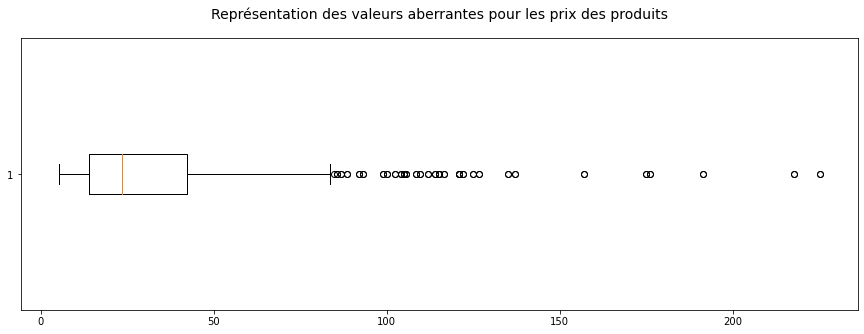

In [78]:
plt.figure(figsize = (15,5))
plt.boxplot(erp_web_final.price, vert = False)
plt.title('Représentation des valeurs aberrantes pour les prix des produits',fontsize = 14, pad=20)
plt.show()

Ce graphique nous montre que :
  - le trait orange représente la médiane des prix, autrement dit la partie à gauche du trait montre que la moitié des prix est compris entre 5€ et 25€ et la partie à droite l'autre moitié dont les prix sont compris entre 25€ et 85€
  - les cercles vides représentent les supposées valeurs aberrantes pour des prix compris entre 85€ et 230€

Comme nous pouvons le constater, il est difficile de différencier les valeurs aberrantes des valeurs normales puisqu'elles s'inscrivent dans une continuité, est-ce normal au niveau de l'achat, du benchmark ou autre ?

Tous ce que nous pouvons dire c'est que nous en avons détecté. 

# Conclusion

Pour conclure ces analyses, les points importants à rappeler sont :
   - les champagnes Gosset représentent une importante part de notre chiffre d'affaires
   - le chiffre d'affaire total s'élève à plus de 70 000€
   - les valeurs de prix extrêmes sont détectées mais ne peuvent pas être différenciées des valeurs normales

En ce qui concerne la qualité des données nécessaires pour réaliser le rapprochement, nous pourrions la qualifier d'inexacte :
   - le point le plus important reste la perte des identifiants pour deux de nos produits que nous ne pouvions pas récupérer dans l'export web
   - en ce qui concerne l'export erp, le fait est qu'un produit a été considéré comme en stock alors qu'il n'y en a aucun en stock  
   - il est également à rapporter qu'aucune unité de variable n'a été fournie pour les prix des produits, nous avons dû supposer qu'ils étaient en euros
   - il faudrait également veiller à ce que les identifiants fassent la différence entre les produits et les informations rattachées à ces produits

Je recommanderais dans un premier temps, pour assurer la qualité des données, de systématiquement vérifier s'il manque des valeurs importantes comme les identifiants, puis dans un deuxième temps de vérifier s'il y a des unités pour les variables comme les prix et, dans le cas contraire, les fournir.